In [25]:
import pandas as pd
import metpy.calc as mc
from metpy.units import units
import numpy as np

In [ ]:
def readBSmooring(file,skip=130):
    h = ['nnn','Year','Mn','Dy','Hr','Mi','s/n','SpSound','DirTr','SpeedBin','Depth','VelUp','VelErr','%good4','corr1','corr2','corr3','corr4','CorrAve','inten1','inten2','inten3','inten4','Julianday']
    a =pd.read_table(file, names=h,skiprows=skip, delim_whitespace=True)
    b = a.drop([0])
    t = []
    for index, a in b.iterrows():
        t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' '+str(int(a.Hr))+':'+str(a.Mi)))
    b['datetime']=t
    u,v, = [],[]
    for index, c in b.iterrows():
        ui,vi = mc.wind_components(c.SpeedBin*units('cm/s'),(c.DirTr-180)*units.deg)
        u.append(ui)
        v.append(vi)
    b['u'] = u
    b['v'] = v
    b = b[(b.SpeedBin < 1000) *(b.DirTr < 1000) ]
    
    return b
    
df1617 = readBSmooring('../data/physicalData/beringStrait/BeringStrait_2016_A3_11.rdat',skip=130)
df1819 = readBSmooring('../data/physicalData/beringStrait/BeringStrait_2018_A3_11.rdat',skip=145)
df1112 = readBSmooring('../data/physicalData/beringStrait/BeringStrait_2011_A3_11.rdat',skip=170)
df1213 = readBSmooring('../data/physicalData/beringStrait/BeringStrait_2012_A3_11.rdat',skip=173)

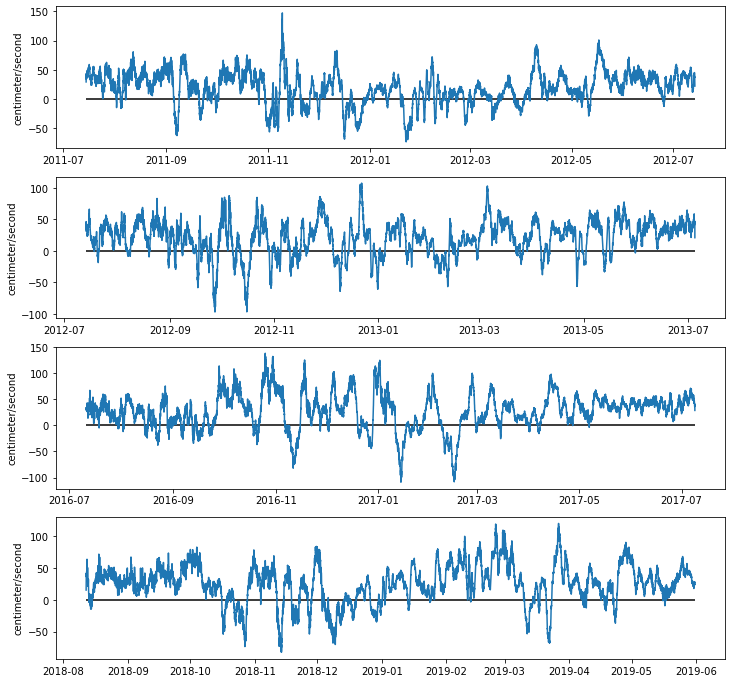

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(df1112.datetime, df1112.v)
plt.hlines([0], df1112.datetime.iloc[0], df1112.datetime.iloc[-1],'k')
plt.subplot(412)
plt.plot(df1213.datetime, df1213.v)
plt.hlines([0], df1213.datetime.iloc[0], df1213.datetime.iloc[-1],'k')
plt.subplot(413)
plt.plot(df1617.datetime, df1617.v)
plt.hlines([0], df1617.datetime.iloc[0], df1617.datetime.iloc[-1],'k')
plt.subplot(414)
plt.plot(df1819.datetime, df1819.v)
plt.hlines([0], df1819.datetime.iloc[0], df1819.datetime.iloc[-1],'k')

In [114]:
df.datetime.iloc[0]

Timestamp('2013-01-01 00:02:00')

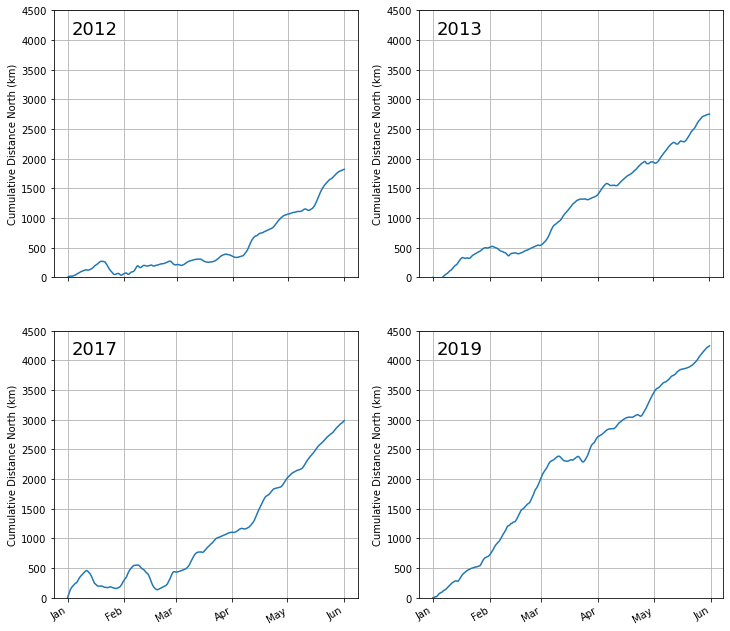

In [120]:
def cumNplot(df):
    plt.plot(df.datetime,np.cumsum(df.v*60*30/100/1000))
    plt.grid()
    plt.text(df.datetime.iloc[100],4100,str(int(df.Year.unique()[0])),fontsize=18)
    ax = plt.gca()
    ax.set_ylim(0,4500)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    fig.autofmt_xdate()
    plt.ylabel('Cumulative Distance North (km)')

fig = plt.figure(figsize=(12,12))
plt.subplot(221)
cumNplot(df1112[(df1112.datetime> pd.to_datetime('2012-01-01'))&(df1112.datetime< pd.to_datetime('2012-06-01'))])
plt.subplot(222)
cumNplot(df1213[(df1213.datetime> pd.to_datetime('2013-01-01'))&(df1213.datetime< pd.to_datetime('2013-06-01'))])
plt.subplot(223)
cumNplot(df1617[(df1617.datetime> pd.to_datetime('2017-01-01'))&(df1617.datetime< pd.to_datetime('2017-06-01'))])
plt.subplot(224)
cumNplot(df1819[(df1819.datetime> pd.to_datetime('2019-01-01'))&(df1819.datetime< pd.to_datetime('2019-06-01'))])